In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rc("figure", facecolor="white")
#print(plt.style.available)
import plotly.io as pio
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
#sns.set(rc={'figure.figsize':(10,8)})
pio.templates.default = "none"
!ls

 BoxPlot-cities-compareyears.ipynb   LinePlots-urban-19vs20.ipynb
 BoxPlot-cities.ipynb		     LinePlots-urban-2019.ipynb
 BoxPlot-compare-urban-rural.ipynb   LinePlots-urban-2020.ipynb
 BoxPlot-means.ipynb		     pm25vspm10.ipynb
 BoxPlot-rural.ipynb		     pm25vspm10-rural.ipynb
 data				     Scatter-pollutants.ipynb
'DataFrame Rationalization.ipynb'    TemperaturePlots.ipynb
 images				     Untitled.ipynb
 LinePlots-15-20.ipynb		    'Urban-Rural comparison.ipynb'
 LinePlots-rural-2020.ipynb


In [2]:
df = pd.read_csv(f'../code/data/city_day.csv')
print(df.City.unique())
print(df.columns)

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']
Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [3]:
city=['Bengaluru','Chennai','Delhi','Coimbatore','Delhi','Guwahati','Hyderabad',
      'Kolkata','Mumbai','Pune','Shillong','Visakhapatnam']
urban=['Bengaluru','Delhi','Hyderabad',
      'Kolkata','Mumbai']
pollutant = ['PM2.5','PM10','NO2','NH3','CO','SO2','O3']
df=df[df.City.isin(urban)]
df.Date=pd.to_datetime(df.Date,format='%Y-%m-%d')
df=df.reset_index()
del df['index']
df=df.fillna(method='pad')

[]

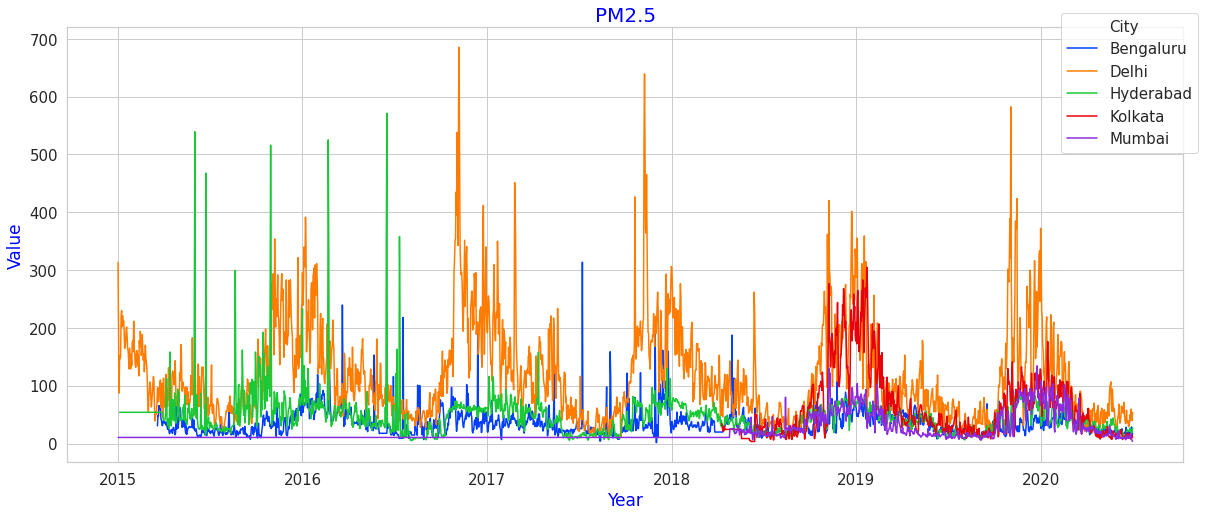

In [9]:
fig , ax = plt.subplots(1,1,figsize = (20,8))
sns.lineplot(df.Date,df['PM2.5'],hue=df['City'])
ax.set_xlabel('Year', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('PM2.5',fontsize=20, c='blue')
myFmt = DateFormatter("%Y")
ax.xaxis.set_major_formatter(myFmt)
plt.legend(bbox_to_anchor=(1.02, 1.05),fontsize=15,frameon=True)
plt.savefig(f'images/15-20_pm2.5_all.png',bbox_inches='tight')
plt.plot()

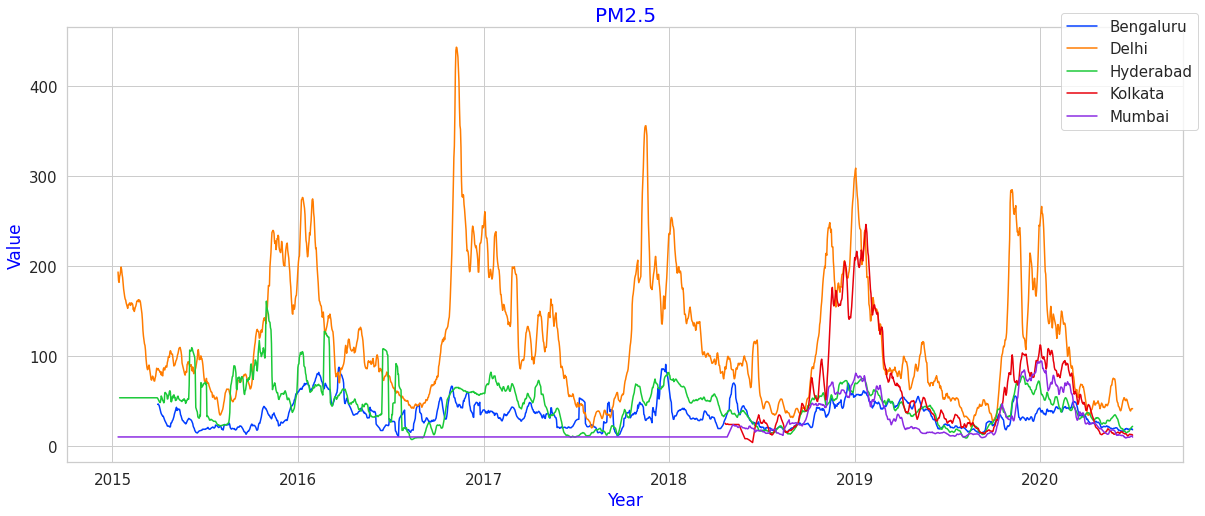

In [7]:
fig,ax = plt.subplots(1,1,figsize=(20,8))
for i in urban:
    dff = df[df['City'].isin([i])]
    dffroll = dff.rolling(window=12,on='Date').mean()
    ax.plot(dffroll.Date,dffroll['PM2.5'],label=i)
ax.set_xlabel('Year', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('PM2.5',fontsize=20, c='blue')
plt.legend(bbox_to_anchor=(1.02, 1.05),fontsize=15,frameon=True)
plt.plot()
fig.savefig(f'images/15-20_pm2.5_all_ma.png',bbox_inches='tight')

[]

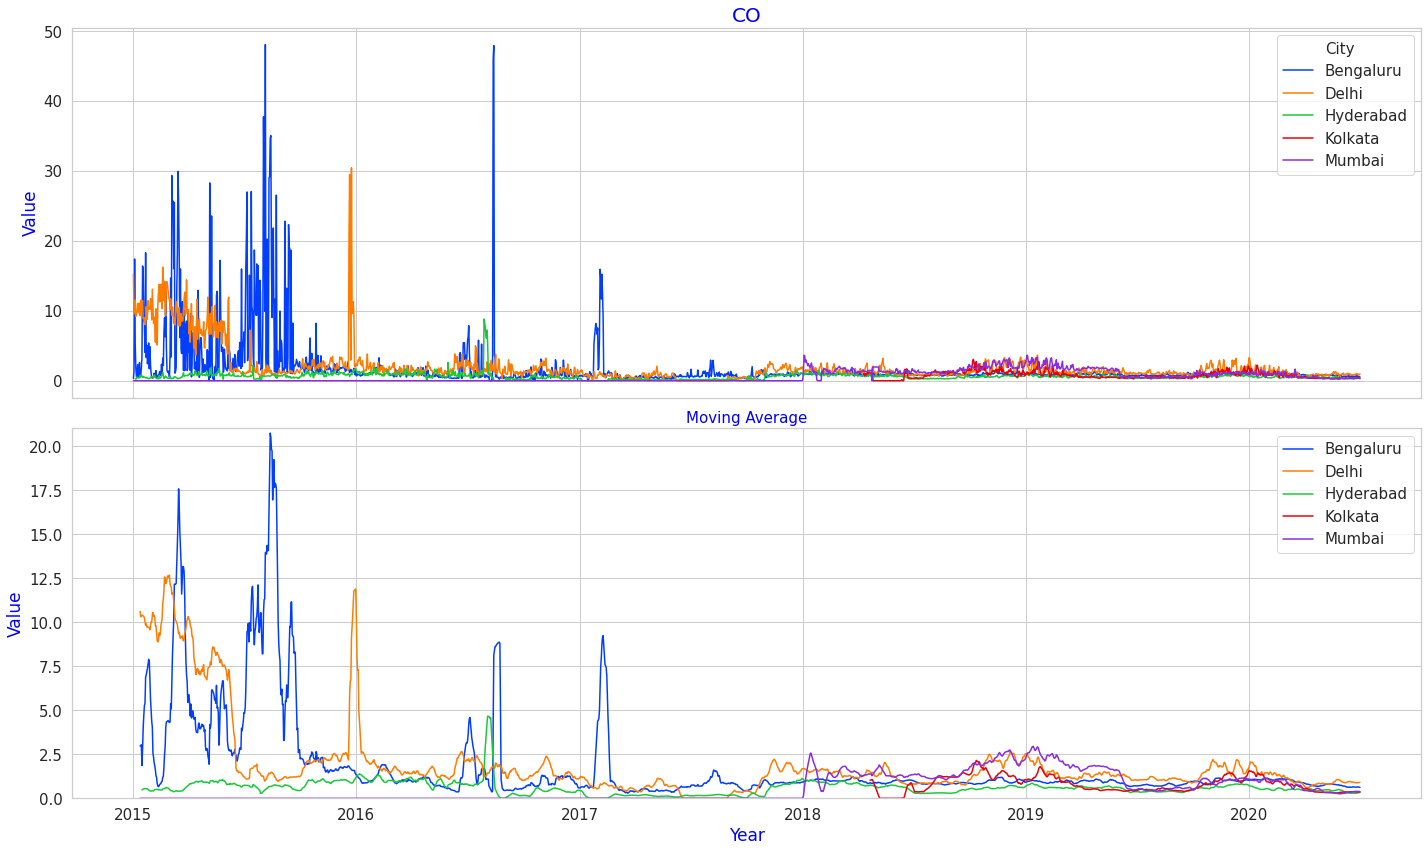

In [31]:
fig , ax = plt.subplots(2,1,figsize = (20,12),sharex=True)
print(ax)
a = ax[0]
sns.lineplot(df.Date,df['CO'],hue=df['City'],ax=a)
a.set_xlabel('Year', fontsize=17,c='blue')
a.set_ylabel('Value', fontsize=17,c='blue')
a.tick_params(axis='both', which='major', labelsize=15)
a.set_title('CO',fontsize=20, c='blue')
a.legend(bbox_to_anchor=(1, 1),fontsize=15,frameon=True)
a = ax[1]
for i in urban:
    dff = df[df['City'].isin([i])]
    dffroll = dff.rolling(window=12,on='Date').mean()
    a.plot(dffroll.Date,dffroll['CO'],label=i)
a.set_xlabel('Year', fontsize=17,c='blue')
a.set_ylabel('Value', fontsize=17,c='blue')
a.set_ylim([0,21])
a.tick_params(axis='both', which='major', labelsize=15)
a.set_title('Moving Average',fontsize=15, c='blue')
a.legend(bbox_to_anchor=(1, 1),fontsize=15,frameon=True)
plt.tight_layout()
fig.savefig(f'images/15-20_pm2.5_co.png',bbox_inches='tight')
plt.plot()

[]

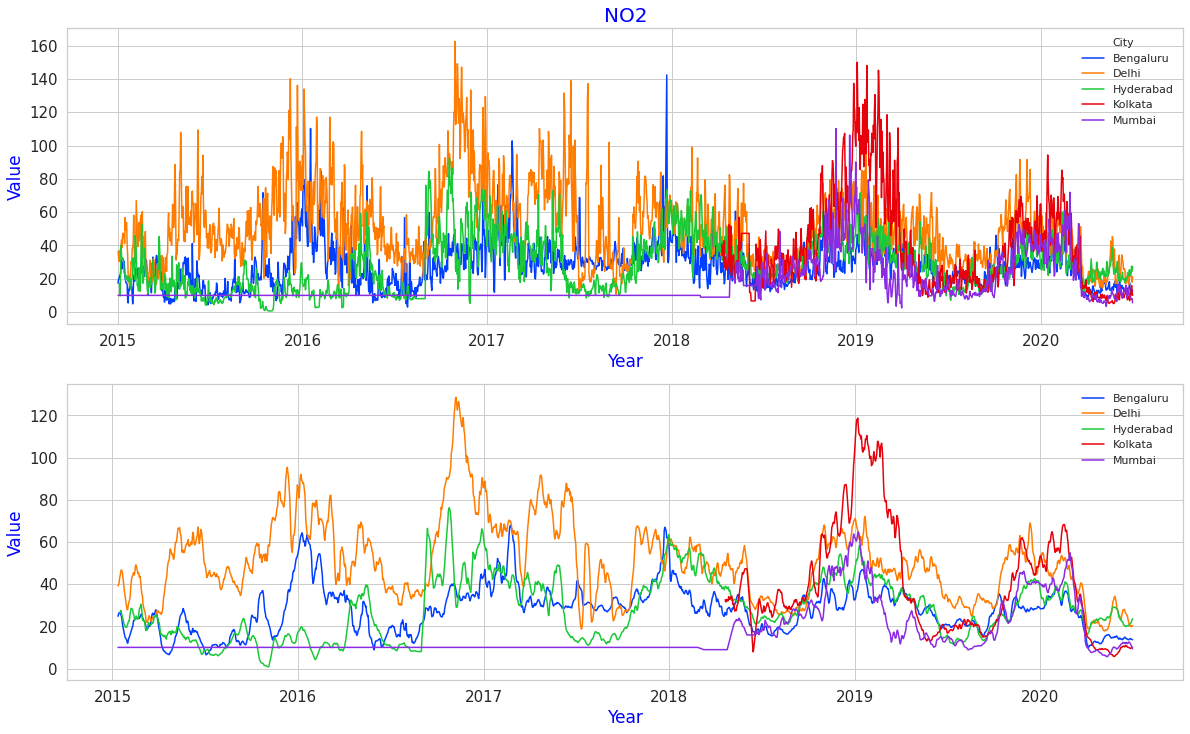

In [17]:
fig , ax = plt.subplots(2,1,figsize = (20,12))
print(ax)
a = ax[0]
sns.lineplot(df.Date,df['NO2'],hue=df['City'],ax=a)
a.set_xlabel('Year', fontsize=17,c='blue')
a.set_ylabel('Value', fontsize=17,c='blue')
a.tick_params(axis='both', which='major', labelsize=15)
a.set_title('NO2',fontsize=20, c='blue')
#a.legend(bbox_to_anchor=(1, 1),fontsize=15,frameon=True)
a = ax[1]
for i in urban:
    dff = df[df['City'].isin([i])]
    dffroll = dff.rolling(window=12,on='Date').mean()
    a.plot(dffroll.Date,dffroll['NO2'],label=i)
a.set_xlabel('Year', fontsize=17,c='blue')
a.set_ylabel('Value', fontsize=17,c='blue')
#a.set_ylim([0,21])
a.tick_params(axis='both', which='major', labelsize=15)
a.set_title('NO2',fontsize=15, c='blue')
a.legend()
plt.tight_layout()
fig.savefig(f'images/15-20_pm2.5_no2.png',bbox_inches='tight')
plt.plot()

[]

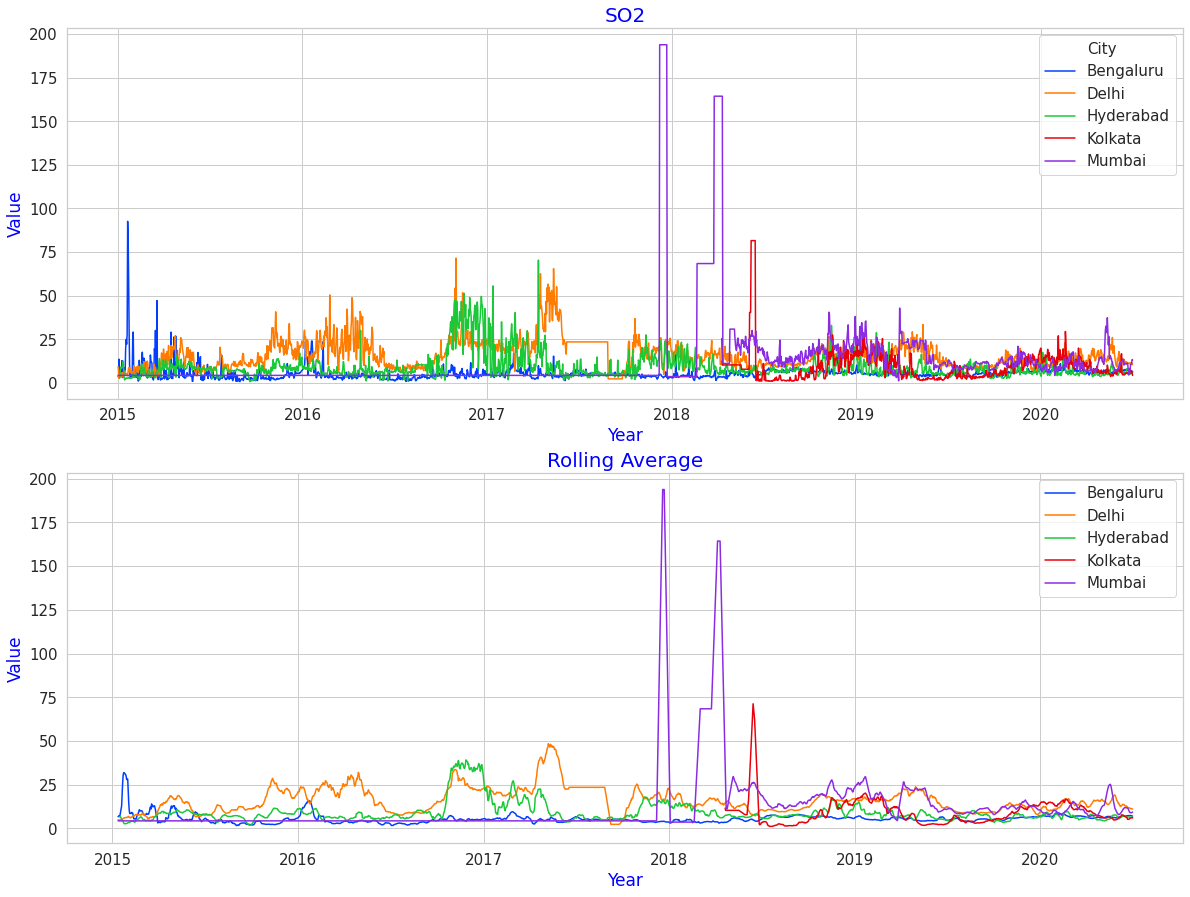

In [13]:
fig , ax = plt.subplots(2,1,figsize = (20,15))
print(ax)
a = ax[0]
sns.lineplot(df.Date,df['SO2'],hue=df['City'],ax=a)
a.set_xlabel('Year', fontsize=17,c='blue')
a.set_ylabel('Value', fontsize=17,c='blue')
a.tick_params(axis='both', which='major', labelsize=15)
a.set_title('SO2',fontsize=20, c='blue')
a.legend(bbox_to_anchor=(1, 1),fontsize=15,frameon=True)
a = ax[1]
for i in urban:
    dff = df[df['City'].isin([i])]
    dffroll = dff.rolling(window=12,on='Date').mean()
    a.plot(dffroll.Date,dffroll['SO2'],label=i)
a.set_xlabel('Year', fontsize=17,c='blue')
a.set_ylabel('Value', fontsize=17,c='blue')
#a.set_ylim([0,21])
a.tick_params(axis='both', which='major', labelsize=15)
a.set_title('Rolling Average',fontsize=20, c='blue')
a.legend(bbox_to_anchor=(1, 1),fontsize=15,frameon=True)
fig.savefig(f'images/15-20_pm2.5_so2.png',bbox_inches='tight')
plt.plot()

In [18]:
df['doy'] = df.Date.dt.dayofyear
df['year'] = df.Date.dt.year
dfd=df[df['City'].isin(['Delhi'])]

In [19]:
pi = dfd.pivot(index = 'doy' ,columns = 'year',values = 'PM2.5')
pi.head(3)

year,2015,2016,2017,2018,2019,2020
doy,,,,,,
1,313.22,295.71,191.50,303.41,287.34,372.14
2,186.18,239.21,247.79,277.48,331.20,327.04
3,87.18,270.10,255.33,217.01,355.40,228.90


In [20]:
pirol = pi.rolling(window=8).mean()
pirol['year'] = 2015
pirol['plotdate'] = pirol.index.astype(str) + '-' +pirol['year'].astype(str)
pirol['plotdate'] = pd.to_datetime(pirol['plotdate'],format = '%j-%Y')
del pirol['year']
pirol

year,2015,2016,2017,2018,2019,2020,plotdate
doy,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02
3,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-03
4,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-04
5,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-05
...,...,...,...,...,...,...,...
362,177.26625,232.12375,216.07750,300.97250,213.77375,NaN,2015-12-28
363,180.25250,246.11125,207.84500,300.46250,223.38875,NaN,2015-12-29
364,183.90875,272.11250,222.32500,301.66625,246.71625,NaN,2015-12-30


[]

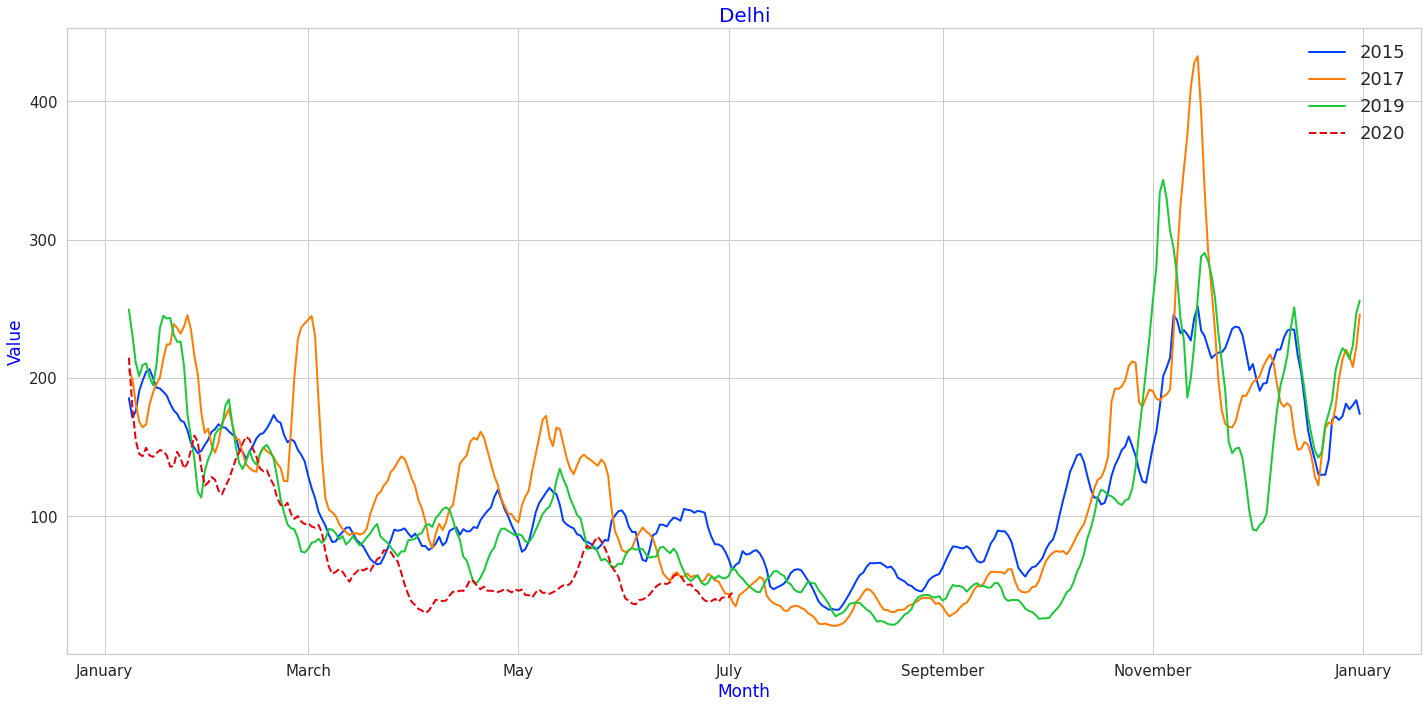

In [26]:
years = [2015,2017,2019]
fig,ax = plt.subplots(1, 1, figsize = (20,10))
for i in years:
    ax.plot(pirol.plotdate,pirol[i],label=i,linewidth=2)
ax.plot(pirol.plotdate,pirol[2020],'--',label='2020',linewidth=2)
ax.set_xlabel('Month', fontsize=17,c='blue')
ax.set_ylabel('Value', fontsize=17,c='blue')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title('Delhi',fontsize=20, c='blue')
myFmt = DateFormatter("%B")
ax.xaxis.set_major_formatter(myFmt)
plt.legend(fontsize=18)
plt.tight_layout()
fig.savefig(f'images/15-20_pm2.5_delhi_yoy.png',bbox_inches='tight')
plt.plot()

[('PM2.5', 2015),
 ('PM2.5', 2016),
 ('PM2.5', 2017),
 ('PM2.5', 2018),
 ('PM2.5', 2019),
 ('PM2.5', 2020)]